Epoch 1/15


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


215/215 [==============================] - 12s 51ms/step - loss: 2.2037 - accuracy: 0.3001 - val_loss: 2.0506 - val_accuracy: 0.3469
Epoch 2/15
215/215 [==============================] - 12s 55ms/step - loss: 1.2415 - accuracy: 0.6052 - val_loss: 2.0367 - val_accuracy: 0.4540
Epoch 3/15
215/215 [==============================] - 12s 56ms/step - loss: 0.8700 - accuracy: 0.7225 - val_loss: 2.1760 - val_accuracy: 0.4723
Epoch 4/15
215/215 [==============================] - 12s 55ms/step - loss: 0.5435 - accuracy: 0.8266 - val_loss: 2.0932 - val_accuracy: 0.5340
Epoch 5/15
215/215 [==============================] - 12s 55ms/step - loss: 0.4093 - accuracy: 0.8701 - val_loss: 2.2946 - val_accuracy: 0.5167
Epoch 6/15
215/215 [==============================] - 12s 56ms/step - loss: 0.3113 - accuracy: 0.9031 - val_loss: 2.6450 - val_accuracy: 0.4864
Epoch 7/15
215/215 [==============================] - 12s 56ms/step - loss: 0.2383 - accuracy: 0.9241 - val_loss: 2.2222 - val_accuracy: 0.5199
Epo

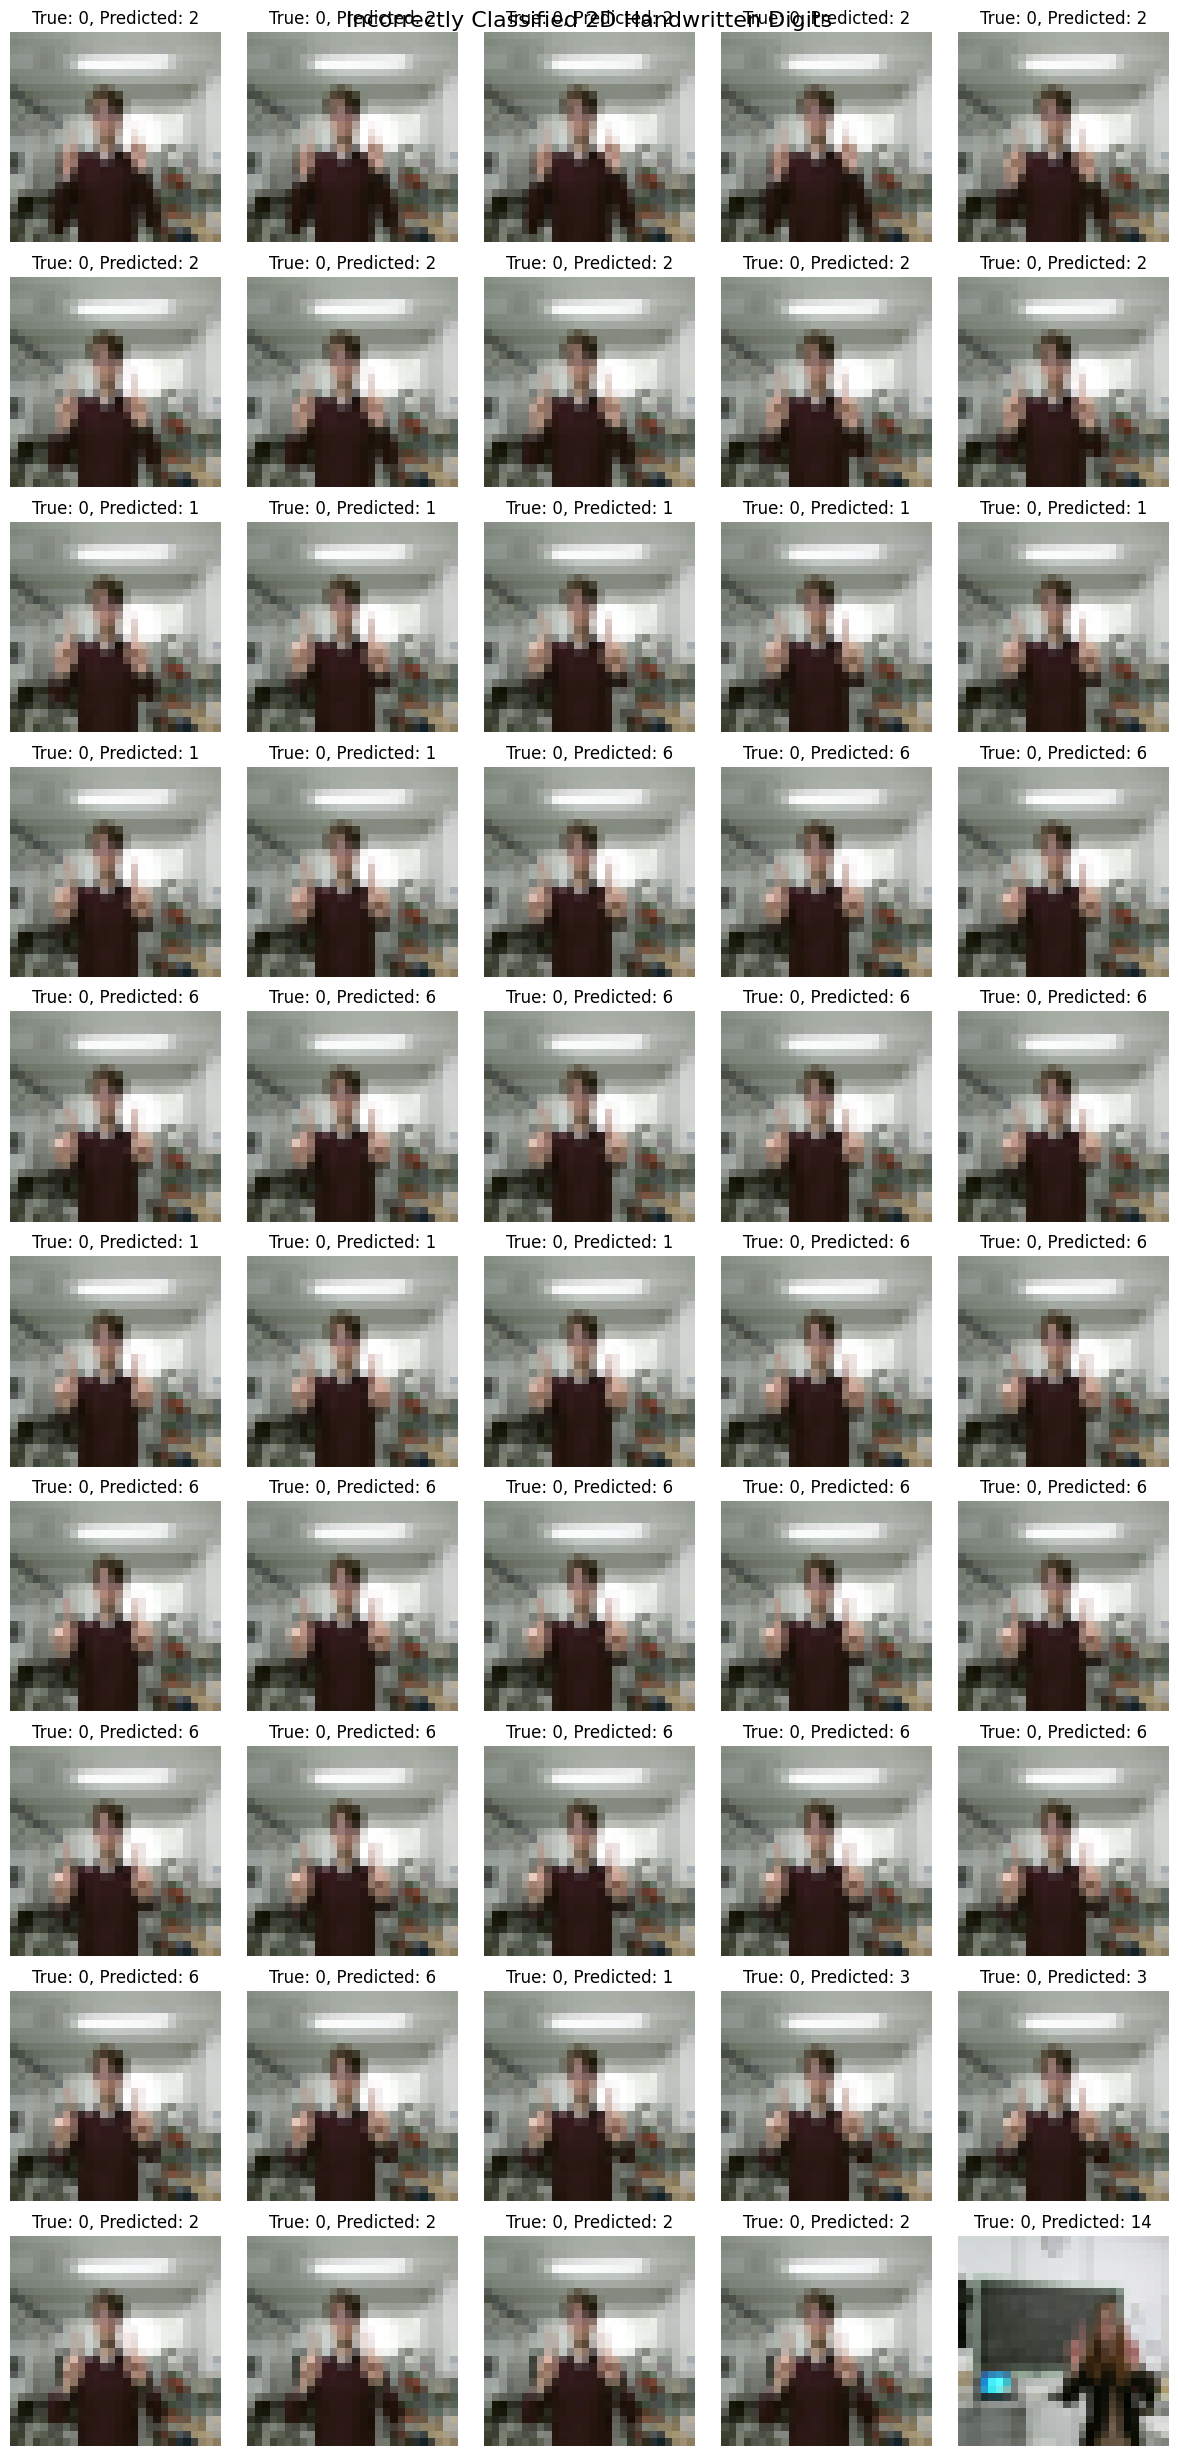

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.optimizers import Adam

# Define the path to your training set folder
train_set_folder = r"C:/Users/user/Desktop/SHAKIB LAST/Train"  # Replace with the path to your training set folder

# Create empty lists to store image and label data
image_data = []
label_data = []
file_names = []  # Store the file names

# Define a dictionary to map folder names to class labels
class_mapping = {
    "Gesture01": 0,
    "Gesture02": 1,
    "Gesture03": 2,
    "Gesture04": 3,
    "Gesture05": 4,
    "Gesture06": 5,
    "Gesture07": 6,
    "Gesture08": 7,
    "Gesture09": 8,
    "Gesture10": 9,
    "Gesture11": 10,
    "Gesture12": 11,
    "Gesture13": 12,
    "Gesture14": 13,
    "Gesture15": 14,
    "Gesture16": 15,
    "Gesture17": 16,
    "Gesture18": 17,
    # Add mappings for the rest of your folder names and class labels
}

# Iterate over the folders in the training set folder
for class_folder in os.listdir(train_set_folder):
    class_folder_path = os.path.join(train_set_folder, class_folder)
    if os.path.isdir(class_folder_path):
        # Get the class label from the folder name using the mapping
        class_label = class_mapping.get(class_folder)
        if class_label is not None:
            # Load images from the class folder
            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)
                image = Image.open(image_path).convert("RGB")  # Open the image in RGB format
                image = image.resize((28, 28))  # Resize the image to (28, 28)
                image_data.append(np.array(image))
                label_data.append(class_label)
                file_names.append(image_file)  # Add the file name

# Convert the image and label data to NumPy arrays
X_train = np.array(image_data)
y_train = np.array(label_data)

# Normalize pixel values between 0 and 1
X_train = X_train / 255.0

# Convert the labels to one-hot encoded format
num_classes = len(class_mapping)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

# Define the path to your test set folder
test_set_folder = r"C:/Users/user/Desktop/SHAKIB LAST/Test"  # Replace with the path to your test set folder

# Create empty lists to store test image and label data
test_image_data = []
test_label_data = []
test_file_names = []  # Store the file names

# Iterate over the folders in the test set folder
for class_folder in os.listdir(test_set_folder):
    class_folder_path = os.path.join(test_set_folder, class_folder)
    if os.path.isdir(class_folder_path):
        # Get the class label from the folder name using the mapping
        class_label = class_mapping.get(class_folder)
        if class_label is not None:
            # Load images from the class folder
            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)
                image = Image.open(image_path).convert("RGB")  # Open the image in RGB format
                image = image.resize((28, 28))  # Resize the image to (28, 28)
                test_image_data.append(np.array(image))
                test_label_data.append(class_label)
                test_file_names.append(image_file)  # Add the file name

# Convert the test image and label data to NumPy arrays
X_test = np.array(test_image_data)
y_test = np.array(test_label_data)

# Normalize pixel values between 0 and 1
X_test = X_test / 255.0

# Convert the test labels to one-hot encoded format
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(256, (3, 3), activation='tanh', input_shape=(28, 28, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

print("Train accuracy:", history.history['accuracy'][-1])
print("Val accuracy:", history.history['val_accuracy'][-1])

print("Train loss:", history.history['loss'][-1])
print("Val loss:", history.history['val_loss'][-1])

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Find misclassified samples
misclassified_samples = X_test[predicted_labels != true_labels]
misclassified_true_labels = true_labels[predicted_labels != true_labels]
misclassified_predicted_labels = predicted_labels[predicted_labels != true_labels]
misclassified_file_names = np.array(test_file_names)[predicted_labels != true_labels]  # Get the misclassified file names

# Print the names of misclassified samples
print("Misclassified Samples:")
for file_name, true_label, predicted_label in zip(misclassified_file_names, misclassified_true_labels,
                                                  misclassified_predicted_labels):
    print("File Name: {}, True Label: {}, Predicted Label: {}".format(file_name, true_label, predicted_label))

# Plot misclassified samples
num_images = 50  # Number of images to display
num_rows = int(np.ceil(num_images / 5))  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, 5, figsize=(12, 2.5 * num_rows))
fig.suptitle('Incorrectly Classified 2D Handwritten Digits', fontsize=16)

for i, image in enumerate(misclassified_samples[:num_images]):
    image = Image.fromarray(np.uint8(image * 255))  # Remove the conversion to grayscale
    row_idx = i // 5
    col_idx = i % 5
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].set_title(f'True: {misclassified_true_labels[i]}, Predicted: {misclassified_predicted_labels[i]}')
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
